In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle

pd.options.display.max_columns = 150

In [121]:
root = Path().cwd().parent
data = root / 'data' / 'MO'
dict_dir = root / 'training' / 'data'

In [63]:
class_dict = pickle.load(open(dict_dir / 'class_dict_NEW2.pkl', 'rb'))
testdf = pd.read_csv(data / 'test_df.csv')
valdf = pd.read_csv(data / 'val_df.csv')
traindf = pd.read_csv(data / 'train_df.csv')

traindf['dataset'] = 'train'
valdf['dataset'] = 'val'
testdf['dataset'] = 'test'

df = pd.concat([traindf, valdf, testdf], axis=0).reset_index(drop=True)
df['ids'] = df['ids'].replace(r"b'", '', regex=True).replace(r"'", '', regex=True)

In [191]:
df.groupby("Species")['Score'].min().sort_values()

Species
Polyporus tuberaster         0.035100
Microstoma floccosum         0.039251
Non-Diagnostic               0.039381
Cantharellus cinnabarinus    0.040715
Leccinum duriusculum         0.041853
                               ...   
Calvatia sculpta             0.793169
Pseudocyphellaria crocata    0.865923
Scytinium palmatum           0.907902
Pilophorus acicularis        0.910268
Entomophthora muscae         0.973711
Name: Score, Length: 1288, dtype: float64

In [100]:
df['correct'] = df['Prediction'] == df['Actual Label']
df['correct'] = df['correct'].astype(int)
group = df.groupby(["Actual Label", 'Species']).agg(total=('correct', 'count'), correct=('correct', 'sum'))

In [117]:
cd = {v:k for k, v in class_dict.items()}

In [110]:
ddf = df.groupby("Species")['Species Pred'].value_counts()#.reset_index()
dfs = ddf.groupby("Species").std()

In [189]:
ddf['Agaricus californicus']

Species Pred
Agaricus californicus         146
Agaricus xanthodermus          69
Non-Diagnostic                 17
Agaricus campestris            10
Agaricus moelleri              10
Agaricus bitorquis              8
Agaricus hondensis              6
Coprinopsis atramentaria        5
Leucoagaricus leucothites       4
Agaricus arvensis               2
Agaricus augustus               2
Agaricus bernardi               2
Chlorophyllum molybdites        2
Chlorophyllum brunneum          2
Agaricus sylvicola              2
Psilocybe caerulescens          2
Agaricus placomyces             1
Amanita porphyria               1
Amanita bisporigera             1
Agrocybe praecox                1
Agaricus albolutescens          1
Volvopluteus gloiocephalus      1
Gyromitra esculenta             1
Lactarius argillaceifolius      1
Clitocybe glacialis             1
Panaeolus cinctulus             1
Stropharia coronilla            1
Pluteus petasatus               1
Leucoagaricus barssii           1
N

In [ ]:
[('Pluteus brunneidiscus', 'Pluteus petasatus'), ('Pluteus primus', 'Pluteus cervinus'), ('Inonotus dryadeus', 'Pseudoinonotus dryadeus'), ('Russula silvestris'),
 ('Russula parvovirescens', 'Russula virescens'), ('Russula heterophylla', 'Russula variata'), ('Suillus ponderosus', 'Suillus caerulescens'), 
 ('Trametes ochracea', 'Trametes versicolor'), ('Trametes aesculi', 'Trametes gibbosa'), ('Ganoderma australe', 'Ganoderma applanatum'), ('Ganoderma megaloma', 'Ganoderma applanatum'),
 ('Hygrocybe chlorophana', 'Hygrocybe flavescens'), ()]

In [125]:
# d = pd.read_csv(dict_dir / 'train_with_MO2.csv')
d['name'] = d['name'].replace({
    'Lepista nuda': 'Clitocybe nuda', 
    'Tremella foliacea': "Phaeotremella foliacea", 
    'Panaeolina foenisecii': 'Panaeolus foenisecii',
    'Panellus serotinus': 'Sarcomyxa serotina',
    'Fomitopsis cajanderi': 'Rhodofomes cajanderi',
    'Amanita amerirubescens': 'Amanita rubescens',
    'Trametes sanguinea': 'Pycnoporus sanguineus',
    'Polyporus alveolaris': 'Neofavolus alveolaris',
    'Trametes conchifer': 'Poronidulus conchifer',
    'Usnea longissima': 'Dolichousnea longissima',
    'Pisolithus arrhizus': 'Pisolithus arhizus',
    'Ricasolia quercizans': 'Lobaria quercizans',
    })

In [104]:
group['percent'] = group['correct'] / group['total']
group['percent'] = group['percent'].round(2)
group.sort_values('percent').head(50)

,,total,correct,percent
Actual Label,Species,,,
40,Amanita amerirubescens,17,2,0.12
433,Fomitopsis pini-canadensis,24,4,0.17
934,Pluteus brunneidiscus,64,12,0.19
1096,Russula virescens,97,25,0.26
1076,Russula heterophylla,112,35,0.31
1090,Russula silvicola,95,32,0.34
847,Panellus serotinus,20,7,0.35
430,Fomitopsis cajanderi,17,6,0.35
1162,Suillus ponderosus,107,39,0.36


In [113]:
dfs.sort_values().head(50)

Species
Suillus pictus                 0.000000
Tremella foliacea              2.753785
Lepista nuda                   2.828427
Panaeolina foenisecii          2.828427
Panellus serotinus             4.242641
Fomitopsis pini-canadensis     4.242641
Fomitopsis cajanderi           4.509250
Mycena metata                  4.575576
Ramalina leptocarpha           4.618802
Amanita amerirubescens         4.827007
Niebla cephalota               4.932883
Tuckermannopsis orbata         5.251984
Pycnoporus sanguineus          5.291503
Pluteus brunneidiscus          5.297798
Phellinus gilvus               5.639149
Inocybe fuscidula              6.151594
Polyporus alveolaris           6.363961
Collybiopsis subpruinosa       6.424906
Pluteus primus                 7.055337
Umbilicaria phaea              7.071068
Parmelia squarrosa             7.087884
Inonotus dryadeus              8.185353
Poronidulus conchifer          8.220908
Clavulina cristata             8.220908
Russula silvicola              8

In [106]:
dfs.sort_values().head(50)

Actual Label
0      0.0
862    0.0
861    0.0
860    0.0
859    0.0
858    0.0
857    0.0
856    0.0
863    0.0
855    0.0
853    0.0
852    0.0
851    0.0
850    0.0
849    0.0
848    0.0
847    0.0
854    0.0
846    0.0
864    0.0
866    0.0
882    0.0
881    0.0
880    0.0
879    0.0
878    0.0
877    0.0
876    0.0
865    0.0
875    0.0
873    0.0
872    0.0
871    0.0
870    0.0
869    0.0
868    0.0
867    0.0
874    0.0
883    0.0
845    0.0
843    0.0
822    0.0
821    0.0
820    0.0
819    0.0
818    0.0
817    0.0
816    0.0
823    0.0
815    0.0
Name: count, dtype: float64

In [74]:
ddf[1160]

Prediction
1160    11
1165     3
Name: count, dtype: int64

In [70]:
class_dict[434]

'Fomitopsis pinicola'

In [19]:
cr = classification_report(preddf['Actual Label'], preddf['Prediction'], output_dict=True)

c:\Users\broug\miniforge3\envs\ds2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\broug\miniforge3\envs\ds2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\broug\miniforge3\envs\ds2\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\broug\miniforge3\envs\ds

In [22]:
cr = pd.DataFrame(cr).transpose()
df = cr.iloc[:-3, :-1]
df

,precision,recall,f1-score
0,0.791667,0.775510,0.783505
1,0.871795,1.000000,0.931507
2,0.500000,0.461538,0.480000
3,0.571429,0.380952,0.457143
4,0.906542,0.815126,0.858407
...,...,...,...
1283,0.875000,0.823529,0.848485
1284,1.000000,0.906250,0.950820
1285,0.882353,0.909091,0.895522
1286,0.879121,0.975610,0.924855


In [194]:
test = df.loc[df['dataset'] == 'test']
val = df.loc[df['dataset'] == 'val']
train = df.loc[df['dataset'] == 'train']
conf_train = pd.crosstab(train['Actual Label'], train['Prediction'], rownames=['Actual Label'], colnames=['Predicted'], margins=True)
conf_val = pd.crosstab(val['Actual Label'], val['Prediction'], rownames=['Actual Label'], colnames=['Predicted'], margins=True)
conf_test = pd.crosstab(test['Actual Label'], test['Prediction'], rownames=['Actual Label'], colnames=['Predicted'], margins=True)

In [200]:
conf_train.iloc[:-1, :-1].div(conf_train.iloc[:-1, :-1].sum(axis=1), axis="index").head(50)

Predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287
Actual Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.827839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001221,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.970696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.670886,0.006329,0.018987,0.018987,0.000000,0.000000,0.006329,0.000000,0.006329,0.000000,0.012658,0.006329,0.000000,0.000000,0.000000,0.000000,0.025316,0.000000,0.082278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,...,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.

<Axes: xlabel='Predicted', ylabel='Actual Label'>

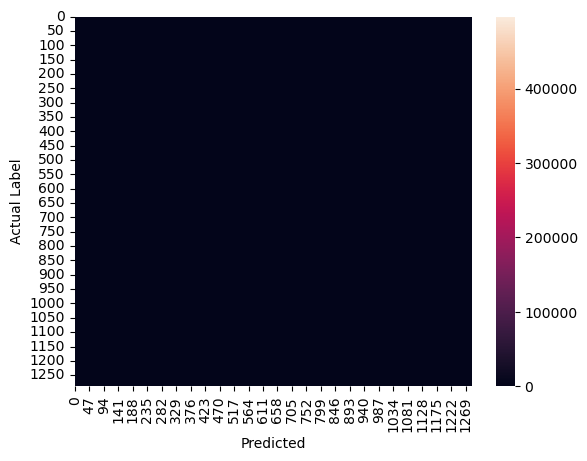

In [195]:
sns.heatmap(conf_train)